<a href="https://colab.research.google.com/github/venkatatharu/ClimateScope_project_venkata_tharun_Avuluri/blob/main/climate_scope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ClimateScope:Visualizing Global Weather Trends and Extreme Events

# Project objective
The objective of ClimateScope is to analyze and visually represent global weather patterns
using the Global Weather Repository dataset. This project aims to uncover seasonal trends,
regional variations, and extreme weather events through interactive and insightful visualizations.
By leveraging daily-updated, worldwide weather data, the project will enable users to explore
climate behavior over time, compare conditions across regions, and identify anomalies. The
ultimate goal is to provide an accessible, data-driven platform that supports climate awareness,
decision-making, and further research into global weather dynamics.

Milestone 1: Data Preparation & Initial Analysis

In [1]:
#Download the Global Weather Repository dataset from Kaggle by using opendatasets
!pip install opendatasets

In [2]:
import opendatasets as od #venkata777 #841f14d339398dbe1f883d3bbaad279c
od.download("https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: venkata777
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository


100%|██████████| 7.44M/7.44M [00:00<00:00, 687MB/s]

Building project environment


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/global-weather-repository/GlobalWeatherRepository.csv') #reading the file

In [5]:
df.shape # to see total observation and colums present in data set


(93927, 41)

In [6]:
pd.set_option('display.max_columns', 41) # to see all columns

In [7]:
df.head() # to see top 5 row's

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  wind_mph  wind_kph  wind_degree  \
0                    79.8  Partly Cloudy       8.3      13.3          338   
1                    66.2  Partly cloudy       6.9      11.2          320   
2                    73.4          Sunny       9.4      15.1          280   
3                    43.3  Light drizzle       7.4      11.9          215   
4                    78.8  Partly cloudy       8.1      13.0          150   

  wind_direction  pressure_mb  pressure_in  precip_mm  precip_in  humidity  \
0            NNW       1012.0        29.89        0.0       0.00        24   
1             NW       1012.0        29.88        0.1       0.00        94   
2              W       1011.0        29.85        0.0       0.00        29   
3             SW       1007.0        29.75        0.3       0.01        61   
4            SSE       1011.0        29.85        0.0       0.00        89   

   cloud  feels_like_celsius  feels_like_fahrenheit  visibility_km  \
0     30                25.3                   77.5           10.0   
1     75                19.0                   66.2           10.0   
2      0                24.6                   76.4           10.0   
3    100                 3.8                   38.9            2.0   
4     50                28.7                   83.6           10.0   

   visibility_miles  uv_index  gust_mph  gust_kph  \
0               6.0       7.0       9.5      15.3   
1               6.0       5.0      11.4      18.4   
2               6.0       5.0      13.9      22.3   
3               1.0       2.0       8.5      13.7   
4               6.0       8.0      12.5      20.2   

   air_quality_Carbon_Monoxide  air_quality_Ozone  \
0                        277.0              103.0   
1                        193.6               97.3   
2                        540.7               12.2   
3                        170.2               64.4   
4                       2964.0               19.0   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                           1.1                          0.2   
1                           0.9                          0.1   
2                          65.1                         13.4   
3                           1.6                          0.2   
4                          72.7                         31.5   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0                8.4              26.6                         1   
1                1.1               2.0                         1   
2               10.4              18.4                         1   
3                0.7               0.9                         1   
4              183.4             262.3                         5   

   air_quality_gb-defra-index   sunrise    sunset  moonrise   moonset  \
0                           1  04:50 AM  06:50 PM  12:12 PM  01:11 AM   
1                           1  05:21 AM  07:54 PM  12:58 PM  02:14 AM   
2                           1  05:40 AM  07:50 PM  01:15 PM  02:14 AM   
3                           1  06:31 AM  09:11 PM  02:12 PM  03:31 AM   
4                          10  06

In [8]:
df.tail()# to see bottom 5 row's

country location_name  latitude  longitude         timezone  \
93922  Venezuela       Caracas   10.5000   -66.9167  America/Caracas   
93923    Vietnam         Hanoi   21.0333   105.8500     Asia/Bangkok   
93924      Yemen         Sanaa   15.3547    44.2067        Asia/Aden   
93925     Zambia        Lusaka  -15.4167    28.2833    Africa/Lusaka   
93926   Zimbabwe        Harare  -17.8178    31.0447    Africa/Harare   

       last_updated_epoch      last_updated  temperature_celsius  \
93922          1757577600  2025-09-11 04:00                 25.1   
93923          1757577600  2025-09-11 15:00                 31.1   
93924          1757577600  2025-09-11 11:00                 23.9   
93925          1757577600  2025-09-11 10:00                 27.0   
93926          1757577600  2025-09-11 10:00                 24.4   

       temperature_fahrenheit      condition_text  wind_mph  wind_kph  \
93922                    77.2  Patchy rain nearby       3.1       5.0   
93923                    88.0       Partly cloudy      10.7      17.3   
93924                    75.0       Partly Cloudy       3.6       5.8   
93925                    80.6               Sunny      11.4      18.4   
93926                    76.0               Sunny       9.4      15.1   

       wind_degree wind_direction  pressure_mb  pressure_in  precip_mm  \
93922          163            SSE       1014.0        29.94       0.12   
93923          144             SE       1007.0        29.74       0.04   
93924           43             NE       1013.0        29.91       0.00   
93925           80              E       1018.0        30.06       0.00   
93926           60            ENE       1020.0        30.13       0.00   

       precip_in  humidity  cloud  feels_like_celsius  feels_like_fahrenheit  \
93922        0.0        83     25                27.9                   82.2   
93923        0.0        79     75                36.8                   98.2   
93924        0.0        27     33                23.8                   74.8   
93925        0.0        29      3                26.0                   78.9   
93926        0.0        30     13                24.4                   75.8   

       visibility_km  visibility_miles  uv_index  gust_mph  gust_kph  \
93922           10.0               6.0       0.0       6.6      10.6   
93923           10.0               6.0       4.3      14.6      23.5   
93924           10.0               6.0      10.2       4.1       6.6   
93925           10.0               6.0       6.8      13.1      21.1   
93926           10.0               6.0       7.3      10.8      17.4   

       air_quality_Carbon_Monoxide  air_quality_Ozone  \
93922                      1200.65               63.0   
93923                       738.15               44.0   
93924                       273.80               80.0   
93925                       407.00               80.0   
93926                       566.10               88.0   

       air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
93922                        14.615                        5.550   
93923                        42.920                       31.080   
93924                         3.330                        1.665   
93925                         1.295                        1.850   
93926                         4.440                        1.665   

       air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
93922             23.495            25.530                         2   
93923             40.885            42.550                         3   
93924             42.735           124.505                         3   
93925             20.905            21.275                         2   
93926             33.670            35.520                         2   

       air_quality_gb-defra-index   sunrise    sunset  moonrise   moonset  \
93922                           2  06:17 AM  06:30 PM  09:43 PM  09:46 AM   
93923                         

In [9]:
df.info()#Inspect dataset structure, data types, and key variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93927 entries, 0 to 93926
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       93927 non-null  object 
 1   location_name                 93927 non-null  object 
 2   latitude                      93927 non-null  float64
 3   longitude                     93927 non-null  float64
 4   timezone                      93927 non-null  object 
 5   last_updated_epoch            93927 non-null  int64  
 6   last_updated                  93927 non-null  object 
 7   temperature_celsius           93927 non-null  float64
 8   temperature_fahrenheit        93927 non-null  float64
 9   condition_text                93927 non-null  object 
 10  wind_mph                      93927 non-null  float64
 11  wind_kph                      93927 non-null  float64
 12  wind_degree                   93927 non-null  int64  
 13  w

In [10]:
df.nunique() # to see number of unique values present in each column


country                           211
location_name                     254
latitude                          394
longitude                         399
timezone                          197
last_updated_epoch                915
last_updated                    15862
temperature_celsius               655
temperature_fahrenheit           1080
condition_text                     47
wind_mph                          179
wind_kph                          179
wind_degree                       360
wind_direction                     16
pressure_mb                        89
pressure_in                       207
precip_mm                         592
precip_in                          73
humidity                           99
cloud                             101
feels_like_celsius                767
feels_like_fahrenheit            1300
visibility_km                      69
visibility_miles                   13
uv_index                          163
gust_mph                          498
gust_kph                          754
air_quality_Carbon_Monoxide      3854
air_quality_Ozone                 635
air_quality_Nitrogen_dioxide     1733
air_quality_Sulphur_dioxide      1734
air_quality_PM2.5                3627
air_quality_PM10                 5354
air_quality_us-epa-index            6
air_quality_gb-defra-index         10
sunrise                           458
sunset                            544
moonrise                         1441
moonset                          1441
moon_phase                          8
moon_illumination                 101
dtype: int64

In [11]:
df.drop_duplicates() #droping the duplicates from datt set

country     location_name  latitude  longitude         timezone  \
0      Afghanistan             Kabul   34.5200    69.1800       Asia/Kabul   
1          Albania            Tirana   41.3300    19.8200    Europe/Tirane   
2          Algeria           Algiers   36.7600     3.0500   Africa/Algiers   
3          Andorra  Andorra La Vella   42.5000     1.5200   Europe/Andorra   
4           Angola            Luanda   -8.8400    13.2300    Africa/Luanda   
...            ...               ...       ...        ...              ...   
93922    Venezuela           Caracas   10.5000   -66.9167  America/Caracas   
93923      Vietnam             Hanoi   21.0333   105.8500     Asia/Bangkok   
93924        Yemen             Sanaa   15.3547    44.2067        Asia/Aden   
93925       Zambia            Lusaka  -15.4167    28.2833    Africa/Lusaka   
93926     Zimbabwe            Harare  -17.8178    31.0447    Africa/Harare   

       last_updated_epoch      last_updated  temperature_celsius  \
0              1715849100  2024-05-16 13:15                 26.6   
1              1715849100  2024-05-16 10:45                 19.0   
2              1715849100  2024-05-16 09:45                 23.0   
3              1715849100  2024-05-16 10:45                  6.3   
4              1715849100  2024-05-16 09:45                 26.0   
...                   ...               ...                  ...   
93922          1757577600  2025-09-11 04:00                 25.1   
93923          1757577600  2025-09-11 15:00                 31.1   
93924          1757577600  2025-09-11 11:00                 23.9   
93925          1757577600  2025-09-11 10:00                 27.0   
93926          1757577600  2025-09-11 10:00                 24.4   

       temperature_fahrenheit      condition_text  wind_mph  wind_kph  \
0                        79.8       Partly Cloudy       8.3      13.3   
1                        66.2       Partly cloudy       6.9      11.2   
2                        73.4               Sunny       9.4      15.1   
3                        43.3       Light drizzle       7.4      11.9   
4                        78.8       Partly cloudy       8.1      13.0   
...                       ...                 ...       ...       ...   
93922                    77.2  Patchy rain nearby       3.1       5.0   
93923                    88.0       Partly cloudy      10.7      17.3   
93924                    75.0       Partly Cloudy       3.6       5.8   
93925                    80.6               Sunny      11.4      18.4   
93926                    76.0               Sunny       9.4      15.1   

       wind_degree wind_direction  pressure_mb  pressure_in  precip_mm  \
0              338            NNW       1012.0        29.89       0.00   
1              320             NW       1012.0        29.88       0.10   
2              280              W       1011.0        29.85       0.00   
3              215             SW       1007.0        29.75       0.30   
4              150            SSE       1011.0        29.85       0.00   
...            ...            ...          ...          ...        ...   
93922          163            SSE       1014.0        29.94       0.12   
93923          144             SE       1007.0        29.74       0.04   
93924           43             NE       1013.0        29.91       0.00   
93925           80              E       1018.0        30.06       0.00   
93926           60            ENE       1020.0        30.13       0.00   

       precip_in  humidity  cloud  feels_like_celsius  feels_like_fahrenheit  \
0           0.00        24     30                25.3                   77.5   
1           0.00        94     75                19.0                   66.2   
2           0.00        29      0                24.6                   76.4   
3           0.01        61    100                 3.8                   38.9   
4           0.00        89     50                28.7                   83.6   
...        

In [12]:
df.isnull().sum() # finding the number of null vales presend in each column

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Nitrogen_dioxide    0
air_quality_Sulphur_dioxide     0
air_quality_PM2.5               0
air_quality_PM10                0
air_quality_us-epa-index        0
air_quality_gb-defra-index      0
sunrise                         0
sunset                          0
moonrise                        0
moonset                         0
moon_phase                      0
moon_illumination               0
dtype: int64

In [13]:
df.describe(include="all") #understanding the data set by using describe

country location_name      latitude     longitude      timezone  \
count      93927         93927  93927.000000  93927.000000         93927   
unique       211           254           NaN           NaN           197   
top     Bulgaria         Kabul           NaN           NaN  Asia/Bangkok   
freq        1015           483           NaN           NaN          1857   
mean         NaN           NaN     19.137442     22.136789           NaN   
std          NaN           NaN     24.463419     65.828817           NaN   
min          NaN           NaN    -41.300000   -175.200000           NaN   
25%          NaN           NaN      3.750000     -6.836100           NaN   
50%          NaN           NaN     17.250000     23.316700           NaN   
75%          NaN           NaN     40.400000     50.580000           NaN   
max          NaN           NaN     64.150000    179.220000           NaN   

        last_updated_epoch      last_updated  temperature_celsius  \
count         9.392700e+04             93927         93927.000000   
unique                 NaN             15862                  NaN   
top                    NaN  2025-04-01 11:30                  NaN   
freq                   NaN                44                  NaN   
mean          1.736763e+09               NaN            22.781526   
std           1.207490e+07               NaN             8.965459   
min           1.715849e+09               NaN           -24.900000   
25%           1.726402e+09               NaN            18.100000   
50%           1.736768e+09               NaN            25.000000   
75%           1.747214e+09               NaN            28.400000   
max           1.757578e+09               NaN            49.200000   

        temperature_fahrenheit condition_text      wind_mph      wind_kph  \
count             93927.000000          93927  93927.000000  93927.000000   
unique                     NaN             47           NaN           NaN   
top                        NaN  Partly cloudy           NaN           NaN   
freq                       NaN          29503           NaN           NaN   
mean                 73.008480            NaN      8.263597     13.302229   
std                  16.137603            NaN      7.971485     12.826547   
min                 -12.800000            NaN      2.200000      3.600000   
25%                  64.600000            NaN      4.000000      6.500000   
50%                  77.000000            NaN      6.900000     11.200000   
75%                  83.100000            NaN     11.400000     18.400000   
max                 120.600000            NaN   1841.200000   2963.200000   

         wind_degree wind_direction   pressure_mb   pressure_in     precip_mm  \
count   93927.000000          93927  93927.000000  93927.000000  93927.000000   
unique           NaN             16           NaN           NaN           NaN   
top              NaN              E           NaN           NaN           NaN   
freq             NaN           8923           NaN           NaN           NaN   
mean      170.966240            NaN   1013.927752     29.940640      0.141402   
std       102.825125            NaN     11.527636      0.340354      0.604527   
min         1.000000            NaN    947.000000     27.960000      0.000000   
25%        83.000000            NaN   1010.000000     29.830000      0.000000   
50%       165.000000            NaN   1013.000000     29.920000      0.000000   
75%       257.000000            NaN   1017.000000     30.040000      0.030000   
max       360.000000            NaN   3006.000000     88.770000     42.240000   

           precip_in      humidity         cloud  feels_like_celsius  \
count   93927.000000  93927.000000  93927.000000        93927.000000   
unique           NaN           NaN           NaN                 NaN   
top              NaN           NaN           NaN                 NaN   
freq             NaN           NaN           NaN                 NaN   
mean     

droping the duplicate units

In [14]:
df_clean = df.drop(columns=[
    "temperature_fahrenheit",    #actually represent the same measurement but in different units
    "feels_like_fahrenheit",     #total 7 of them
    "wind_mph",
    "gust_mph",
    "pressure_in",
    "precip_in",
    "visibility_miles"
])
from IPython.display import display
display(df_clean.head())

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius condition_text  \
0          1715849100  2024-05-16 13:15                 26.6  Partly Cloudy   
1          1715849100  2024-05-16 10:45                 19.0  Partly cloudy   
2          1715849100  2024-05-16 09:45                 23.0          Sunny   
3          1715849100  2024-05-16 10:45                  6.3  Light drizzle   
4          1715849100  2024-05-16 09:45                 26.0  Partly cloudy   

   wind_kph  wind_degree wind_direction  pressure_mb  precip_mm  humidity  \
0      13.3          338            NNW       1012.0        0.0        24   
1      11.2          320             NW       1012.0        0.1        94   
2      15.1          280              W       1011.0        0.0        29   
3      11.9          215             SW       1007.0        0.3        61   
4      13.0          150            SSE       1011.0        0.0        89   

   cloud  feels_like_celsius  visibility_km  uv_index  gust_kph  \
0     30                25.3           10.0       7.0      15.3   
1     75                19.0           10.0       5.0      18.4   
2      0                24.6           10.0       5.0      22.3   
3    100                 3.8            2.0       2.0      13.7   
4     50                28.7           10.0       8.0      20.2   

   air_quality_Carbon_Monoxide  air_quality_Ozone  \
0                        277.0              103.0   
1                        193.6               97.3   
2                        540.7               12.2   
3                        170.2               64.4   
4                       2964.0               19.0   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                           1.1                          0.2   
1                           0.9                          0.1   
2                          65.1                         13.4   
3                           1.6                          0.2   
4                          72.7                         31.5   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0                8.4              26.6                         1   
1                1.1               2.0                         1   
2               10.4              18.4                         1   
3                0.7               0.9                         1   
4              183.4             262.3                         5   

   air_quality_gb-defra-index   sunrise    sunset  moonrise   moonset  \
0                           1  04:50 AM  06:50 PM  12:12 PM  01:11 AM   
1                           1  05:21 AM  07:54 PM  12:58 PM  02:14 AM   
2                           1  05:40 AM  07:50 PM  01:15 PM  02:14 AM   
3                           1  06:31 AM  09:11 PM  02:12 PM  03:31 AM   
4                          10  06:12 AM  05:55 PM  01:17 PM  12:38 AM   

       moon_phase  moon_illumination  
0  Waxing Gibbous                 55  
1  Waxing Gibbous                 55  
2  Waxing Gibbous                 55  
3  Waxing Gibbous                 55  
4  Waxing Gibbous                 55

In [15]:
df_clean["last_updated"] = pd.to_datetime(df_clean["last_updated"]) #last_updated column is still a string (object dtype), not a proper datetime
                                                                    #Converting  column to datetime


In [16]:
#same coverting srting data type into datatime data type
# why python detecting string data type because  in data set columes (moonrise and moonset) data has  "No moonrise" doesn’t match the time format.
# so i make it Nat and replace with None
df_clean["sunrise"]  = pd.to_datetime(df_clean["sunrise"],  format="%I:%M %p", errors="coerce").dt.time.astype(str).replace("NaT", "None")
df_clean["sunset"]   = pd.to_datetime(df_clean["sunset"],   format="%I:%M %p", errors="coerce").dt.time.astype(str).replace("NaT", "None")
df_clean["moonrise"] = pd.to_datetime(df_clean["moonrise"], format="%I:%M %p", errors="coerce").dt.time.astype(str).replace("NaT", "None")
df_clean["moonset"]  = pd.to_datetime(df_clean["moonset"],  format="%I:%M %p", errors="coerce").dt.time.astype(str).replace("NaT", "None")


In [17]:
df_clean.to_csv('df_clean.csv', index=False) #Save the cleaned dataframe into a CSV file named 'df_clean.csv' .

In [18]:
df1=pd.read_csv('df_clean.csv') #reading the 'df_clean.csv' file.

In [19]:
df1.head() # seeing the top 5 row's in 'df_clean.csv'  file.

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch         last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15:00                 26.6   
1          1715849100  2024-05-16 10:45:00                 19.0   
2          1715849100  2024-05-16 09:45:00                 23.0   
3          1715849100  2024-05-16 10:45:00                  6.3   
4          1715849100  2024-05-16 09:45:00                 26.0   

  condition_text  wind_kph  wind_degree wind_direction  pressure_mb  \
0  Partly Cloudy      13.3          338            NNW       1012.0   
1  Partly cloudy      11.2          320             NW       1012.0   
2          Sunny      15.1          280              W       1011.0   
3  Light drizzle      11.9          215             SW       1007.0   
4  Partly cloudy      13.0          150            SSE       1011.0   

   precip_mm  humidity  cloud  feels_like_celsius  visibility_km  uv_index  \
0        0.0        24     30                25.3           10.0       7.0   
1        0.1        94     75                19.0           10.0       5.0   
2        0.0        29      0                24.6           10.0       5.0   
3        0.3        61    100                 3.8            2.0       2.0   
4        0.0        89     50                28.7           10.0       8.0   

   gust_kph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0      15.3                        277.0              103.0   
1      18.4                        193.6               97.3   
2      22.3                        540.7               12.2   
3      13.7                        170.2               64.4   
4      20.2                       2964.0               19.0   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                           1.1                          0.2   
1                           0.9                          0.1   
2                          65.1                         13.4   
3                           1.6                          0.2   
4                          72.7                         31.5   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0                8.4              26.6                         1   
1                1.1               2.0                         1   
2               10.4              18.4                         1   
3                0.7               0.9                         1   
4              183.4             262.3                         5   

   air_quality_gb-defra-index   sunrise    sunset  moonrise   moonset  \
0                           1  04:50:00  18:50:00  12:12:00  01:11:00   
1                           1  05:21:00  19:54:00  12:58:00  02:14:00   
2                           1  05:40:00  19:50:00  13:15:00  02:14:00   
3                           1  06:31:00  21:11:00  14:12:00  03:31:00   
4                          10  06:12:00  17:55:00  13:17:00  00:38:00   

       moon_phase  moon_illumination  
0  Waxing Gibbous                 55  
1  Waxing Gibbous                 55  
2  Waxing Gibbous                 55  
3  Waxing Gibbous                 55  
4  Waxing Gibbous                 55

In [20]:
 #Aggregate / Filter Data (Daily → Monthly Averages)
df_monthly = (
    df_clean
    .set_index("last_updated")
    .groupby("country")
    .resample("ME")
    .mean(numeric_only=True)
    .reset_index()
)
display(df_monthly.head())



country last_updated  latitude  longitude  last_updated_epoch  \
0  Afghanistan   2024-05-31     34.52      69.18        1.716478e+09   
1  Afghanistan   2024-06-30     34.52      69.18        1.718503e+09   
2  Afghanistan   2024-07-31     34.52      69.18        1.721101e+09   
3  Afghanistan   2024-08-31     34.52      69.18        1.723811e+09   
4  Afghanistan   2024-09-30     34.52      69.18        1.726442e+09   

   temperature_celsius   wind_kph  wind_degree  pressure_mb  precip_mm  \
0            20.305882  11.517647   127.941176  1010.000000   0.108824   
1            25.590000  17.110000   126.833333  1004.900000   0.072667   
2            31.303448  20.731034   103.862069   998.000000   0.000345   
3            30.848387  20.196774    57.709677  1001.258065   0.037097   
4            28.216667  12.223333    67.566667  1004.800000   0.014333   

    humidity      cloud  feels_like_celsius  visibility_km  uv_index  \
0  38.058824  31.764706           20.358824       9.764706  3.764706   
1  24.833333  20.833333           24.603333       9.800000  6.500000   
2  17.931034  13.068966           29.475862      10.000000  7.758621   
3  20.548387  11.903226           29.316129       9.774194  7.483871   
4  13.733333  13.066667           26.390000       9.833333  7.000000   

    gust_kph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0  16.141176                  1424.094118          77.452941   
1  20.336667                  1481.570000          87.650000   
2  23.841379                   624.758621         119.327586   
3  23.238710                   605.025806         119.612903   
4  14.063333                   376.173333         138.046667   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                     16.400000                     0.588235   
1                     17.000000                     0.530000   
2                      4.700000                     0.306897   
3                      3.641935                     0.306452   
4                      2.523667                    13.977000   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0           7.894118         17.411765                  1.000000   
1           7.380000         16.786667                  1.000000   
2           9.065517         23.596552                  1.068966   
3           9.638710         22.674194                  1.032258   
4          20.996833         42.791667                  1.666667   

   air_quality_gb-defra-index  moon_illumination  
0                    1.117647          78.647059  
1                    1.066667          49.800000  
2                    1.137931          43.758621  
3                    1.225806          45.548387  
4                    2.366667          46.100000

In [21]:
df_monthly.to_csv('df_monthly.csv', index=False) #Save the monthly dataframe into a CSV file named 'df_monthly.csv' .

In [22]:
df2=pd.read_csv('df_monthly.csv') # reading the file

In [23]:
df2.head() # seeing tos 5 row'5 in 'df_monthly.csv' file

country last_updated  latitude  longitude  last_updated_epoch  \
0  Afghanistan   2024-05-31     34.52      69.18        1.716478e+09   
1  Afghanistan   2024-06-30     34.52      69.18        1.718503e+09   
2  Afghanistan   2024-07-31     34.52      69.18        1.721101e+09   
3  Afghanistan   2024-08-31     34.52      69.18        1.723811e+09   
4  Afghanistan   2024-09-30     34.52      69.18        1.726442e+09   

   temperature_celsius   wind_kph  wind_degree  pressure_mb  precip_mm  \
0            20.305882  11.517647   127.941176  1010.000000   0.108824   
1            25.590000  17.110000   126.833333  1004.900000   0.072667   
2            31.303448  20.731034   103.862069   998.000000   0.000345   
3            30.848387  20.196774    57.709677  1001.258065   0.037097   
4            28.216667  12.223333    67.566667  1004.800000   0.014333   

    humidity      cloud  feels_like_celsius  visibility_km  uv_index  \
0  38.058824  31.764706           20.358824       9.764706  3.764706   
1  24.833333  20.833333           24.603333       9.800000  6.500000   
2  17.931034  13.068966           29.475862      10.000000  7.758621   
3  20.548387  11.903226           29.316129       9.774194  7.483871   
4  13.733333  13.066667           26.390000       9.833333  7.000000   

    gust_kph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0  16.141176                  1424.094118          77.452941   
1  20.336667                  1481.570000          87.650000   
2  23.841379                   624.758621         119.327586   
3  23.238710                   605.025806         119.612903   
4  14.063333                   376.173333         138.046667   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                     16.400000                     0.588235   
1                     17.000000                     0.530000   
2                      4.700000                     0.306897   
3                      3.641935                     0.306452   
4                      2.523667                    13.977000   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0           7.894118         17.411765                  1.000000   
1           7.380000         16.786667                  1.000000   
2           9.065517         23.596552                  1.068966   
3           9.638710         22.674194                  1.032258   
4          20.996833         42.791667                  1.666667   

   air_quality_gb-defra-index  moon_illumination  
0                    1.117647          78.647059  
1                    1.066667          49.800000  
2                    1.137931          43.758621  
3                    1.225806          45.548387  
4                    2.366667          46.100000

In [24]:
#Aggregate / Filter Data (Daily → yearly Averages)
df_yearly = (
    df_clean                            #Aggregate / Filter
    .set_index('last_updated')
    .groupby('country')
    .resample('YE')
    .mean(numeric_only=True)
    .reset_index()
)
df_yearly.head()

country last_updated   latitude  longitude  last_updated_epoch  \
0  Afghanistan   2024-12-31  34.518703  69.181297        1.725745e+09   
1  Afghanistan   2025-12-31  34.516700  69.183300        1.746652e+09   
2      Albania   2024-12-31  41.329017  19.819568        1.725745e+09   
3      Albania   2025-12-31  41.327500  19.818900        1.746652e+09   
4      Algeria   2024-12-31  36.761224   3.050237        1.725762e+09   

   temperature_celsius   wind_kph  wind_degree  pressure_mb  precip_mm  \
0            22.696943  12.113974    99.257642  1008.096070   0.038603   
1            20.778740   8.235433   123.543307  1009.421260   0.040118   
2            25.022271  11.429694   237.855895  1014.899563   0.169651   
3            21.479528   8.046063   221.362205  1016.318898   0.092362   
4            25.154386  15.312719   174.412281  1017.035088   0.025351   

    humidity      cloud  feels_like_celsius  visibility_km  uv_index  \
0  22.497817  16.419214           21.810044       9.890830  5.057205   
1  26.433071  16.956693           19.262992       9.791339  6.974409   
2  49.532751  26.205240           25.559389       9.851092  5.010917   
3  48.393701  27.330709           21.303937       9.984252  3.933858   
4  55.407895  28.048246           26.760526       9.745614  4.786404   

    gust_kph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0  15.079476                   774.743013         107.629258   
1  10.289370                   707.275394         128.799213   
2  15.961572                   257.638646          83.346288   
3   9.975591                   307.952165          75.854331   
4  20.516228                   307.305263          88.343860   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                      7.655328                     7.974389   
1                      7.045295                    12.698720   
2                     10.230000                     4.604236   
3                     16.895453                     8.955020   
4                     30.107917                    12.673136   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0          14.860000         28.745873                  1.388646   
1          25.002677         65.470335                  1.881890   
2          13.593777         18.724323                  1.349345   
3          19.599075         26.334094                  1.673228   
4          18.584364         35.214364                  1.574561   

   air_quality_gb-defra-index  moon_illumination  
0                    1.772926          48.672489  
1                    2.665354          52.425197  
2                    1.672489          48.606987  
3                    2.169291          52.437008  
4                    2.122807          48.394737

In [25]:
# Take user input for a date and country, then filter the dataframe
# to show weather information for that specific day and country.
# The result is displayed as a table
input_date = input("Enter date (YYYY-MM-DD): ")
input_country = input("Enter country: ")

day_info = df_clean[
    (df_clean["country"] == input_country) &
    (df_clean["last_updated"].dt.date == pd.to_datetime(input_date).date())
]

from IPython.display import display
display(day_info)



Enter date (YYYY-MM-DD): 2025-06-16
Enter country: India


country location_name  latitude  longitude      timezone  \
76849   India     New Delhi      28.6       77.2  Asia/Kolkata   

       last_updated_epoch        last_updated  temperature_celsius  \
76849          1750064400 2025-06-16 14:30:00                 31.3   

      condition_text  wind_kph  wind_degree wind_direction  pressure_mb  \
76849           Mist       6.8          190              S       1000.0   

       precip_mm  humidity  cloud  feels_like_celsius  visibility_km  \
76849       0.01        63     75                29.9            4.0   

       uv_index  gust_kph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
76849       2.9       7.9                       997.15              130.0   

       air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
76849                        28.305                       32.745   

       air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
76849            121.545             377.4                         4   

       air_quality_gb-defra-index   sunrise    sunset  moonrise   moonset  \
76849                          10  05:23:00  19:21:00  23:21:00  09:47:00   

           moon_phase  moon_illumination  
76849  Waning Gibbous                 81

In [26]:
#Standardize (Z-score normalization)

from sklearn.preprocessing import StandardScaler
## Get only numeric columns
numeric_cols = df_clean.select_dtypes(include='number').columns

scaler = StandardScaler()
df_standardized = df_clean.copy()
df_standardized[numeric_cols] = scaler.fit_transform(df_clean[numeric_cols])

display(df_standardized.head())


country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul  0.628802   0.714633      Asia/Kabul   
1      Albania            Tirana  0.907178  -0.035194   Europe/Tirane   
2      Algeria           Algiers  0.720367  -0.289947  Africa/Algiers   
3      Andorra  Andorra La Vella  0.955005  -0.313190  Europe/Andorra   
4       Angola            Luanda -1.143650  -0.135303   Africa/Luanda   

   last_updated_epoch        last_updated  temperature_celsius condition_text  \
0           -1.732003 2024-05-16 13:15:00             0.425912  Partly Cloudy   
1           -1.732003 2024-05-16 10:45:00            -0.421791  Partly cloudy   
2           -1.732003 2024-05-16 09:45:00             0.024369          Sunny   
3           -1.732003 2024-05-16 10:45:00            -1.838346  Light drizzle   
4           -1.732003 2024-05-16 09:45:00             0.358988  Partly cloudy   

   wind_kph  wind_degree wind_direction  pressure_mb  precip_mm  humidity  \
0 -0.000174     1.624454            NNW    -0.167230  -0.233907 -1.649410   
1 -0.163898     1.449398             NW    -0.167230  -0.068488  1.239820   
2  0.140161     1.060386              W    -0.253978  -0.233907 -1.443036   
3 -0.109323     0.428242             SW    -0.600972   0.262351 -0.122245   
4 -0.023563    -0.203903            SSE    -0.253978  -0.233907  1.033447   

      cloud  feels_like_celsius  visibility_km  uv_index  gust_kph  \
0 -0.277282            0.138973       0.144259  0.849096 -0.224964   
1  1.055867           -0.451080       0.144259  0.296988 -0.015824   
2 -1.166049            0.073412       0.144259  0.296988  0.247288   
3  1.796506           -1.874699      -3.030028 -0.531175 -0.332907   
4  0.315229            0.457415       0.144259  1.125150  0.105613   

   air_quality_Carbon_Monoxide  air_quality_Ozone  \
0                    -0.282896           1.224042   
1                    -0.381336           1.048808   
2                     0.028356          -1.567403   
3                    -0.408955           0.037371   
4                     2.888647          -1.358352   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                     -0.560509                    -0.268137   
1                     -0.568197                    -0.270556   
2                      1.899453                     0.051195   
3                     -0.541291                    -0.268137   
4                      2.191573                     0.489066   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0          -0.433218         -0.166351                 -0.774106   
1          -0.610743         -0.315143                 -0.774106   
2          -0.384581         -0.215948                 -0.774106   
3          -0.620470         -0.321796                 -0.774106   
4           3.822522          1.259275                  3.290145   

   air_quality_gb-defra-index   sunrise    sunset  moonrise   moonset  \
0                   -0.685839  04:50:00  18:50:00  12:12:00  01:11:00   
1                   -0.685839  05:21:00  19:54:00  12:58:00  02:14:00   
2                   -0.685839  05:40:00  19:50:00  13:15:00  02:14:00   
3                   -0.685839  06:31:00  21:11:00  14:12:00  03:31:00   
4                    2.807356  06:12:00  17:55:00  13:17:00  00:38:00   

       moon_phase  moon_illumination  
0  Waxing Gibbous           0.124836  
1  Waxing Gibbous           0.124836  
2  Waxing Gibbous           0.124836  
3  Waxing Gibbous           0.124836  
4  Waxing Gibbous           0.124836

In [27]:
# Choose a few numeric columns to visualize
cols_to_plot = ["temperature_celsius", "humidity", "wind_kph",
                "pressure_mb", "precip_mm", "air_quality_PM2.5"]

# Plot only Z-score distributions (one below the other)
plt.figure(figsize=(8, 18))  # Taller figure for vertical layout

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(len(cols_to_plot), 1, i)
    plt.hist(df_standardized[col].dropna(), bins=30,
             color="purple", edgecolor="black", alpha=0.7)
    plt.title(f"Z-score Distribution of {col}")
    plt.xlabel("Z-score")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

plt.show()


In [28]:
#Find the top 5 rainiest days per country
rainy_days = (
    df_clean.sort_values("precip_mm", ascending=False)
    .groupby("country")
    .head(5)[["country", "last_updated", "precip_mm"]]
)
display(rainy_days.head(5))

country        last_updated  precip_mm
33439        Jamaica 2024-11-05 04:00:00      42.24
22098        Vietnam 2024-09-07 19:00:00      27.82
81715  Guinea-Bissau 2025-07-11 08:30:00      27.40
30375        Jamaica 2024-10-20 04:30:00      26.38
92717   Sierra Leone 2025-09-05 08:00:00      26.28

In [29]:
# Filter the dataset to find records with poor air quality (PM2.5 > 100).
bad_air = df_clean[df_clean['air_quality_PM2.5'] > 100][["country","last_updated","location_name","air_quality_PM2.5"]]
bad_air.head()

country        last_updated   location_name  air_quality_PM2.5
4       Angola 2024-05-16 09:45:00          Luanda              183.4
35       Chile 2024-05-16 04:45:00        Santiago              211.1
68   Guatemala 2024-05-16 02:45:00  Guatemala City              132.0
78   Indonesia 2024-05-16 15:45:00         Jakarta              196.1
173   Thailand 2024-05-16 15:45:00         Bangkok              115.2

In [30]:
# Find the top 5 hottest days per country
top_hot_days = (
    df_clean
    .sort_values(by="temperature_celsius", ascending=False)
    .groupby("country")
    .head(5)[["country","location_name","last_updated", "temperature_celsius"]]
)

display(top_hot_days.head(5))


country location_name        last_updated  temperature_celsius
6896   Kuwait   Kuwait City 2024-06-19 16:45:00                 49.2
11145    Iraq       Baghdad 2024-07-11 15:45:00                 49.1
7460     Iraq       Baghdad 2024-06-22 16:45:00                 49.1
8425   Kuwait   Kuwait City 2024-06-27 16:15:00                 48.9
11338    Iraq       Baghdad 2024-07-12 15:45:00                 48.8

In [31]:
min_date = df_clean["last_updated"].min()
max_date = df_clean["last_updated"].max()

# Duration in days
duration_days = (max_date - min_date).days

print(f"Data covers from {min_date.date()} to {max_date.date()} ({duration_days} days)")

Data covers from 2024-05-16 to 2025-09-11 (483 days)


### Milestone 2: Core Analysis & Visualization Design


In [32]:
numeric_cols = [
    "temperature_celsius", "feels_like_celsius", "humidity", "wind_kph",
    "gust_kph", "pressure_mb", "precip_mm", "cloud", "visibility_km", "uv_index",
    "air_quality_Carbon_Monoxide", "air_quality_Ozone", "air_quality_Nitrogen_dioxide",
    "air_quality_Sulphur_dioxide", "air_quality_PM2.5", "air_quality_PM10",
    "air_quality_us-epa-index", "air_quality_gb-defra-index"
]



In [33]:
print("Basic Statistics:")
display(df_clean[numeric_cols].describe())

Basic Statistics:


temperature_celsius  feels_like_celsius      humidity      wind_kph  \
count         93927.000000        93927.000000  93927.000000  93927.000000   
mean             22.781526           23.816181     63.961747     13.302229   
std               8.965459           10.677064     24.228035     12.826547   
min             -24.900000          -35.600000      2.000000      3.600000   
25%              18.100000           18.100000     47.000000      6.500000   
50%              25.000000           26.000000     69.000000     11.200000   
75%              28.400000           30.800000     83.000000     18.400000   
max              49.200000           51.200000    100.000000   2963.200000   

           gust_kph   pressure_mb     precip_mm         cloud  visibility_km  \
count  93927.000000  93927.000000  93927.000000  93927.000000   93927.000000   
mean      18.634547   1013.927752      0.141402     39.359566       9.636430   
std       14.822689     11.527636      0.604527     33.754827       2.520264   
min        3.600000    947.000000      0.000000      0.000000       0.000000   
25%       10.600000   1010.000000      0.000000      0.000000      10.000000   
50%       16.000000   1013.000000      0.000000     26.000000      10.000000   
75%       24.600000   1017.000000      0.030000     75.000000      10.000000   
max     2970.400000   3006.000000     42.240000    100.000000      32.000000   

           uv_index  air_quality_Carbon_Monoxide  air_quality_Ozone  \
count  93927.000000                 93927.000000       93927.000000   
mean       3.924169                   516.675909          63.184410   
std        3.622498                   847.226110          32.528124   
min        0.000000                 -9999.000000           0.000000   
25%        0.600000                   237.000000          42.200000   
50%        3.100000                   327.450000          60.000000   
75%        7.000000                   506.900000          80.000000   
max       16.300000                 38879.398000         480.700000   

       air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
count                  93927.000000                 93927.000000   
mean                      15.682582                    11.283794   
std                       26.016797                    41.336594   
min                        0.000000                 -9999.000000   
25%                        1.295000                     0.800000   
50%                        4.810000                     2.405000   
75%                       17.760000                     9.065000   
max                      427.700000                   521.330000   

       air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
count       93927.000000      93927.000000              93927.000000   
mean           26.214322         54.102893                  1.761868   
std            41.121149        165.331839                  0.984196   
min             0.168000      -1848.150000                  1.000000   
25%             7.345000         10.730000                  1.000000   
50%            15.170000         22.200000                  1.000000   
75%            30.100000         46.435000                  2.000000   
max          1614.100000       6037.290000                  6.000000   

       air_quality_gb-defra-index  
count                93927.000000  
mean                     2.767021  
std                      2.576452  
min                      1.000000  
25%                      1.000000  
50%                      2.000000  
75%                      3.000000  
max                     10.000000

In [34]:
from scipy.stats import skew, kurtosis

print("Skewness & Kurtosis:")
for col in numeric_cols:
    col_skew = skew(df_clean[col].dropna())
    col_kurt = kurtosis(df_clean[col].dropna())
    display(f"{col}:                        Skew={col_skew:.2f},                                Kurtosis={col_kurt:.2f}")

Skewness & Kurtosis:


'temperature_celsius:                        Skew=-0.80,                                Kurtosis=0.89'

'feels_like_celsius:                        Skew=-0.81,                                Kurtosis=0.83'

'humidity:                        Skew=-0.53,                                Kurtosis=-0.67'

'wind_kph:                        Skew=130.03,                                Kurtosis=29787.48'

'gust_kph:                        Skew=84.76,                                Kurtosis=16744.19'

'pressure_mb:                        Skew=109.42,                                Kurtosis=18873.03'

'precip_mm:                        Skew=18.48,                                Kurtosis=679.38'

'cloud:                        Skew=0.26,                                Kurtosis=-1.34'

'visibility_km:                        Skew=1.44,                                Kurtosis=15.69'

'uv_index:                        Skew=0.67,                                Kurtosis=-0.47'

'air_quality_Carbon_Monoxide:                        Skew=12.92,                                Kurtosis=318.73'

'air_quality_Ozone:                        Skew=1.22,                                Kurtosis=5.39'

'air_quality_Nitrogen_dioxide:                        Skew=3.06,                                Kurtosis=12.67'

'air_quality_Sulphur_dioxide:                        Skew=-150.05,                                Kurtosis=36618.34'

'air_quality_PM2.5:                        Skew=8.87,                                Kurtosis=161.68'

'air_quality_PM10:                        Skew=16.05,                                Kurtosis=373.91'

'air_quality_us-epa-index:                        Skew=1.44,                                Kurtosis=1.89'

'air_quality_gb-defra-index:                        Skew=1.83,                                Kurtosis=2.26'

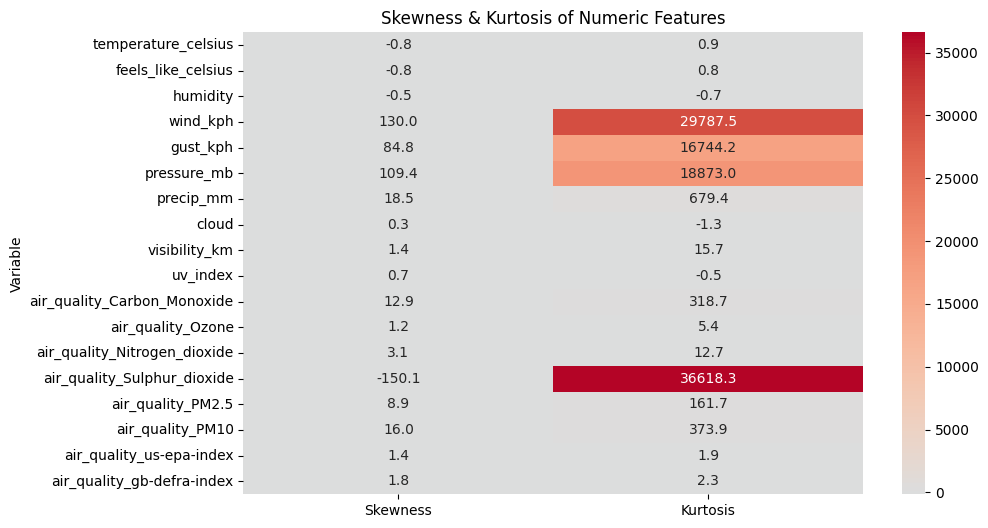

In [35]:


# Collect values
stats = []
for col in numeric_cols:
    stats.append([col, skew(df_clean[col].dropna()), kurtosis(df_clean[col].dropna())])

df_stats = pd.DataFrame(stats, columns=["Variable", "Skewness", "Kurtosis"])

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_stats.set_index("Variable"), annot=True, cmap="coolwarm", center=0, fmt=".1f")
plt.title("Skewness & Kurtosis of Numeric Features")
plt.show()


In [36]:

from scipy.stats import zscore

# Make a copy of the dataset
df_cleaned = df_clean.copy()

# Choose only the bad columns (or replace numeric_cols to apply on all)
cols_to_clean = ["pressure_mb", "air_quality_Sulphur_dioxide"]

for col in cols_to_clean:
    z_scores = zscore(df_clean[col].dropna())   # compute z-scores
    mask = abs(z_scores) < 3                    # keep only within 3 std dev
    # replace outliers with NaN
    df_cleaned.loc[df_clean[col].dropna().index, col] = df_clean[col].dropna().where(mask, np.nan)

# Check before vs after
print("Before cleaning:")
print(df_clean[cols_to_clean].describe())

print("\nAfter cleaning:")
print(df_cleaned[cols_to_clean].describe())


Before cleaning:
        pressure_mb  air_quality_Sulphur_dioxide
count  93927.000000                 93927.000000
mean    1013.927752                    11.283794
std       11.527636                    41.336594
min      947.000000                 -9999.000000
25%     1010.000000                     0.800000
50%     1013.000000                     2.405000
75%     1017.000000                     9.065000
max     3006.000000                   521.330000

After cleaning:
        pressure_mb  air_quality_Sulphur_dioxide
count  93887.000000                 93175.000000
mean    1013.894139                     9.984612
std        6.926117                    19.359565
min      980.000000                     0.000000
25%     1010.000000                     0.800000
50%     1013.000000                     2.405000
75%     1017.000000                     8.695000
max     1048.000000                   135.235000


In [37]:
print("\n Skewness & Kurtosis after cleaning:")
for col in numeric_cols:
    col_skew = skew(df_cleaned[col].dropna())
    col_kurt = kurtosis(df_cleaned[col].dropna())
    print(f"{col}: Skew={col_skew:.2f}, Kurtosis={col_kurt:.2f}")



 Skewness & Kurtosis after cleaning:
temperature_celsius: Skew=-0.80, Kurtosis=0.89
feels_like_celsius: Skew=-0.81, Kurtosis=0.83
humidity: Skew=-0.53, Kurtosis=-0.67
wind_kph: Skew=130.03, Kurtosis=29787.48
gust_kph: Skew=84.76, Kurtosis=16744.19
pressure_mb: Skew=0.21, Kurtosis=1.33
precip_mm: Skew=18.48, Kurtosis=679.38
cloud: Skew=0.26, Kurtosis=-1.34
visibility_km: Skew=1.44, Kurtosis=15.69
uv_index: Skew=0.67, Kurtosis=-0.47
air_quality_Carbon_Monoxide: Skew=12.92, Kurtosis=318.73
air_quality_Ozone: Skew=1.22, Kurtosis=5.39
air_quality_Nitrogen_dioxide: Skew=3.06, Kurtosis=12.67
air_quality_Sulphur_dioxide: Skew=3.32, Kurtosis=12.20
air_quality_PM2.5: Skew=8.87, Kurtosis=161.68
air_quality_PM10: Skew=16.05, Kurtosis=373.91
air_quality_us-epa-index: Skew=1.44, Kurtosis=1.89
air_quality_gb-defra-index: Skew=1.83, Kurtosis=2.26


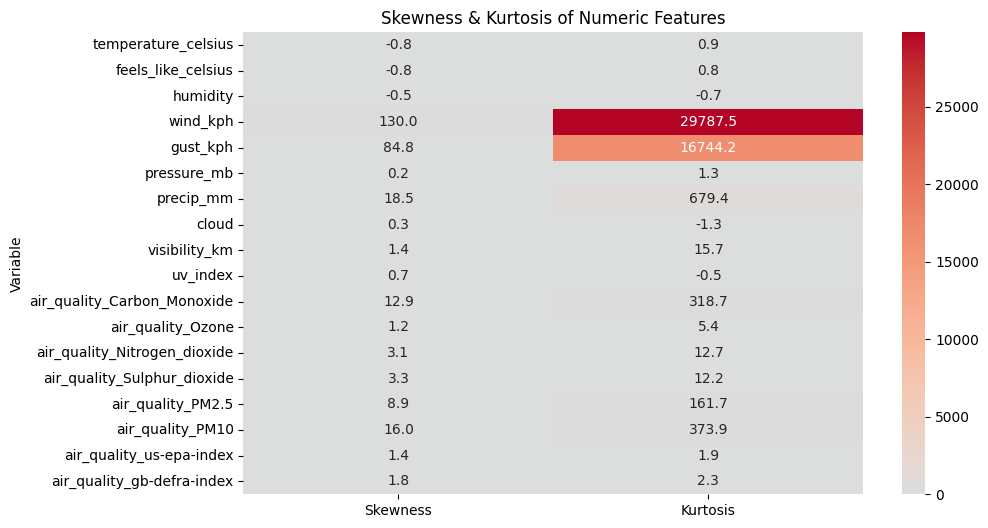

In [38]:


# Collect values
stats = []
for col in numeric_cols:
    stats.append([col, skew(df_cleaned [col].dropna()), kurtosis(df_cleaned [col].dropna())])

df_stats = pd.DataFrame(stats, columns=["Variable", "Skewness", "Kurtosis"])

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_stats.set_index("Variable"), annot=True, cmap="coolwarm", center=0, fmt=".1f")
plt.title("Skewness & Kurtosis of Numeric Features")
plt.show()

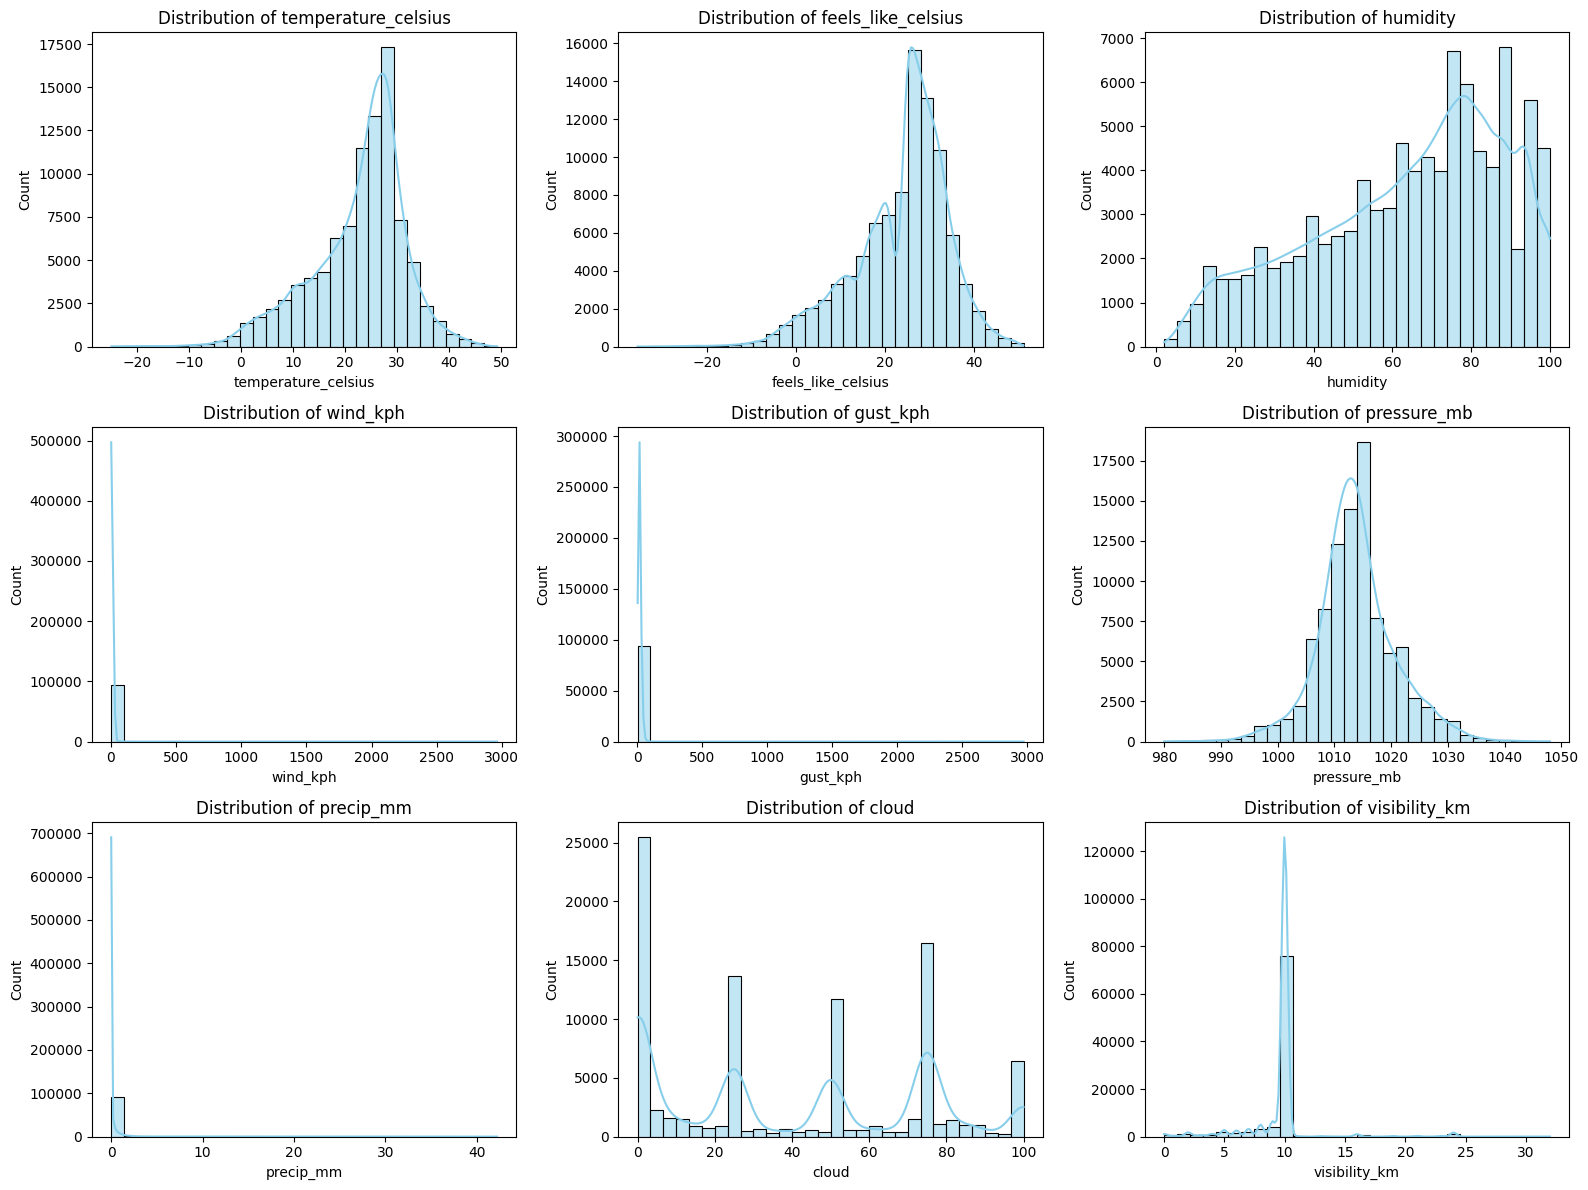

In [39]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:9], 1):   # first 9 variables
    plt.subplot(3, 3, i)
    sns.histplot(df_cleaned[col].dropna(), kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


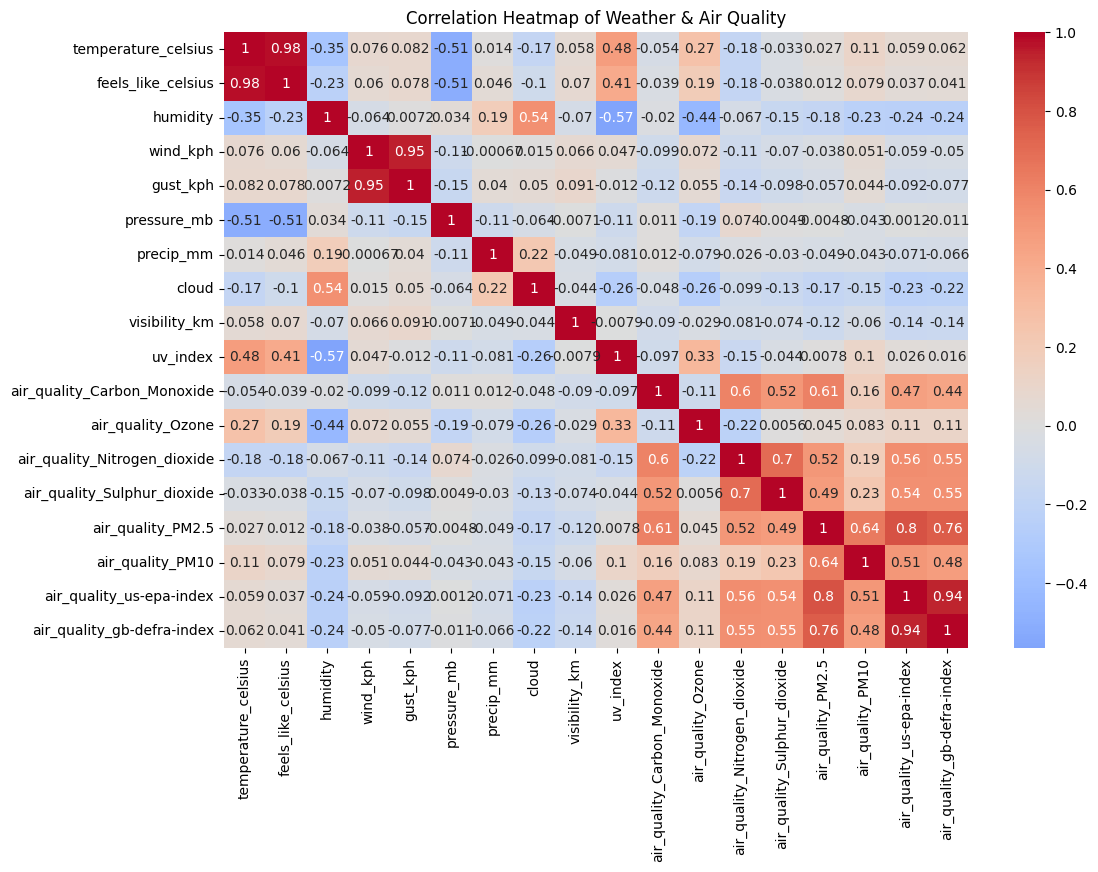

In [40]:
plt.figure(figsize=(12, 8))
corr = df_cleaned[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Weather & Air Quality")
plt.show()

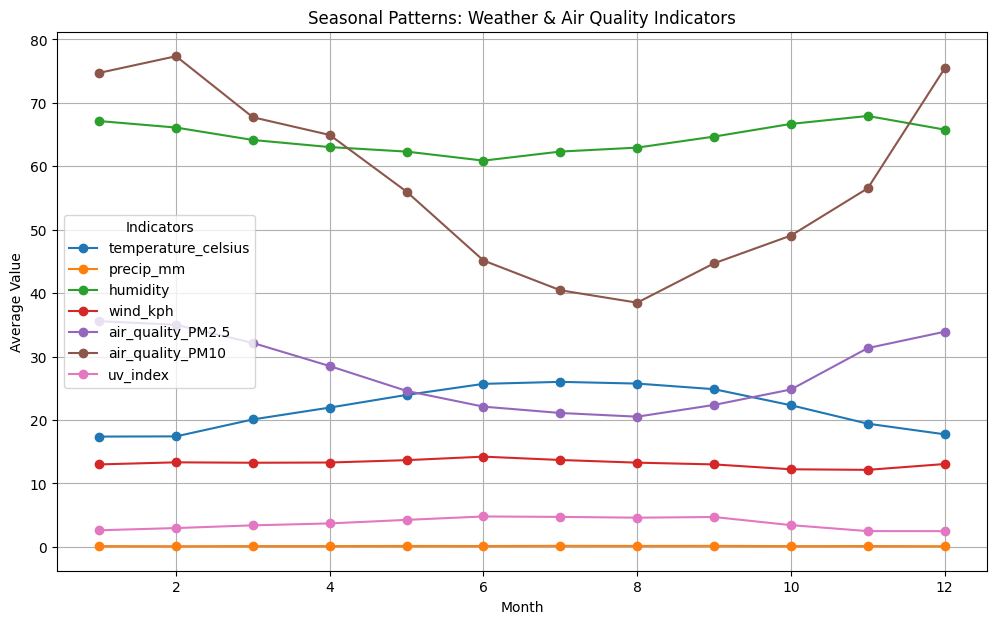

In [41]:
# Extract month from datetime
df_cleaned["month"] = df_cleaned["last_updated"].dt.month

# Add more important seasonal columns
cols_to_analyze = [
    "temperature_celsius",
    "precip_mm",
    "humidity",
    "wind_kph",
    "air_quality_PM2.5",
    "air_quality_PM10",
    "uv_index"
]

# Compute monthly averages
monthly_avg = df_cleaned.groupby("month")[cols_to_analyze].mean()

# Plot
monthly_avg.plot(kind="line", marker="o", figsize=(12, 7))
plt.title("Seasonal Patterns: Weather & Air Quality Indicators")
plt.xlabel("Month")
plt.ylabel("Average Value")
plt.legend(title="Indicators")
plt.grid(True)
plt.show()


In [42]:
import plotly.express as px

fig = px.choropleth(
    df_cleaned,
    locations="country",
    locationmode="country names",
    color="temperature_celsius",
    hover_name="country",
    animation_frame=df_cleaned["last_updated"].dt.month,
    title="Monthly Average Temperature by Country"
)
fig.show()


In [43]:
print(df_cleaned["country"].unique() ) # show first 20 unique country names


['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Madagascar' 'Cape Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Swaziland' 'Ethiopia' 'Fiji Islands' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Vatican City'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazak

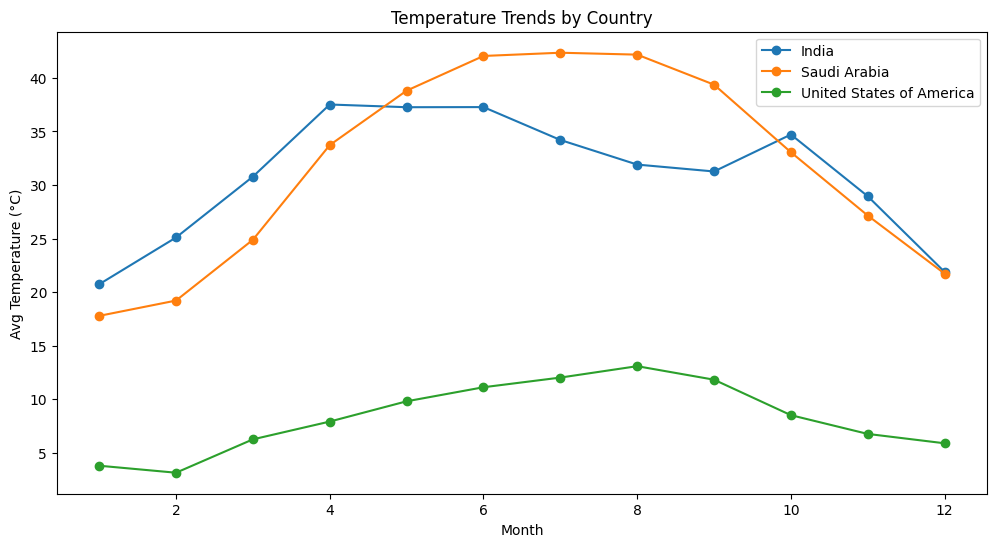

In [44]:
plt.figure(figsize=(12,6))
for c in ["India", "Saudi Arabia", "United States of America"]:  # pick sample regions
    region_data = df_cleaned[df_cleaned["country"] == c].groupby("month")["temperature_celsius"].mean()
    plt.plot(region_data.index, region_data.values, marker="o", label=c)

plt.legend()
plt.title("Temperature Trends by Country")
plt.xlabel("Month")
plt.ylabel("Avg Temperature (°C)")
plt.show()


In [45]:

pd.set_option('display.max_rows',5)

# Choose the country you want
country_name = "United States of America"   # change to "USA" or any other available country

# Filter data
country_data = df_cleaned[df_cleaned["country"] == country_name]

# Show first few rows
display(country_data.head(5))



country    location_name  latitude  longitude  \
186  United States of America  Washington Park      46.6    -120.49   
381  United States of America  Washington Park      46.6    -120.49   
574  United States of America  Washington Park      46.6    -120.49   
767  United States of America  Washington Park      46.6    -120.49   
962  United States of America  Washington Park      46.6    -120.49   

                timezone  last_updated_epoch        last_updated  \
186  America/Los_Angeles          1715849100 2024-05-16 01:45:00   
381  America/Los_Angeles          1715868900 2024-05-16 07:15:00   
574  America/Los_Angeles          1715962500 2024-05-17 09:15:00   
767  America/Los_Angeles          1716042600 2024-05-18 07:30:00   
962  America/Los_Angeles          1716128100 2024-05-19 07:15:00   

     temperature_celsius condition_text  wind_kph  wind_degree wind_direction  \
186                 16.1          Clear       6.8          220             SW   
381                 15.6          Sunny      37.1          300            WNW   
574                 13.3          Sunny      11.2          300            WNW   
767                  8.9       Overcast       3.6           10              N   
962                  7.8          Sunny      29.9          320             NW   

     pressure_mb  precip_mm  humidity  cloud  feels_like_celsius  \
186       1012.0        0.0        58      0                16.1   
381       1011.0        0.0        55      0                15.6   
574       1016.0        0.0        31      0                13.0   
767       1016.0        0.0        63    100                 7.8   
962       1019.0        0.0        63      0                 7.0   

     visibility_km  uv_index  gust_kph  air_quality_Carbon_Monoxide  \
186           16.0       1.0      16.6                        198.6   
381           16.0       4.0      44.3                        212.0   
574           16.0       4.0      18.4                        217.0   
767           16.0       3.0       9.1                        213.6   
962           16.0       3.0      37.1                        205.3   

     air_quality_Ozone  air_quality_Nitrogen_dioxide  \
186               62.2                           2.5   
381               36.1                           4.6   
574               85.8                           1.2   
767               50.1                           3.0   
962               64.4                           2.7   

     air_quality_Sulphur_dioxide  air_quality_PM2.5  air_quality_PM10  \
186                          0.2                6.3               7.1   
381                          0.1                7.8               8.8   
574                          0.2                0.5               1.1   
767                          0.2                0.9               1.9   
962                          0.1                0.5               0.6   

     air_quality_us-epa-index  air_quality_gb-defra-index   sunrise    sunset  \
186                         1                           1  05:26:00  20:31:00   
381                         1                           1  05:26:00  20:31:00   
574                         1                           1  05:25:00  20:33:00   
767                         1                           1  05:24:00  20:34:00   
962                         1                           1  05:23:00  20:35:00   

     moonrise   moonset      moon_phase  moon_illumination  month  
186  13:36:00  02:52:00  Waxing Gibbous                 55      5  
381  13:36:00  02:52:00  Waxing Gibbous                 55      5  
574  14:40:00  03:08:00  Waxing Gibbous                 64      5  
767  15:45:00  03:22:00  Waxing Gibbous                 73      5  
962  16:50:00  03:36:00  Waxing Gibbous                 81      5

In [46]:
#  Define thresholds for "extreme" values
extreme_conditions = {
    "heatwave": df_cleaned["temperature_celsius"] > 40,   # >40°C
    "cold_wave": df_cleaned["temperature_celsius"] < 0,   # <0°C
    "heavy_rain": df_cleaned["precip_mm"] > 100,          # >100 mm rainfall
    "storm": df_cleaned["wind_kph"] > 80,                 # strong winds
    "high_pollution": df_cleaned["air_quality_PM2.5"] > 150  # unhealthy air
}

#  Create a dictionary of extreme events
extreme_events = {}
for event, condition in extreme_conditions.items():
    extreme_events[event] = df_cleaned[condition][
        ["country", "location_name", "last_updated",
         "temperature_celsius", "precip_mm", "wind_kph", "air_quality_PM2.5"]
    ]

# Example: Show first 5 heatwave events
print(" Heatwaves Detected:")
display(extreme_events["heatwave"].head())


 Heatwaves Detected:


country location_name        last_updated  temperature_celsius  \
77          India     New Delhi 2024-05-16 14:15:00                 42.0   
229          Chad     N'djamena 2024-05-16 15:00:00                 42.0   
346  Saudi Arabia        Riyadh 2024-05-16 17:15:00                 41.0   
424          Chad     N'djamena 2024-05-17 17:00:00                 42.0   
608  Burkina Faso   Ouagadougou 2024-05-18 14:30:00                 40.7   

     precip_mm  wind_kph  air_quality_PM2.5  
77         0.0      11.2               25.4  
229        0.0      11.2               34.5  
346        0.0      15.1               27.1  
424        0.0      22.0               32.1  
608        0.0       5.4               37.3

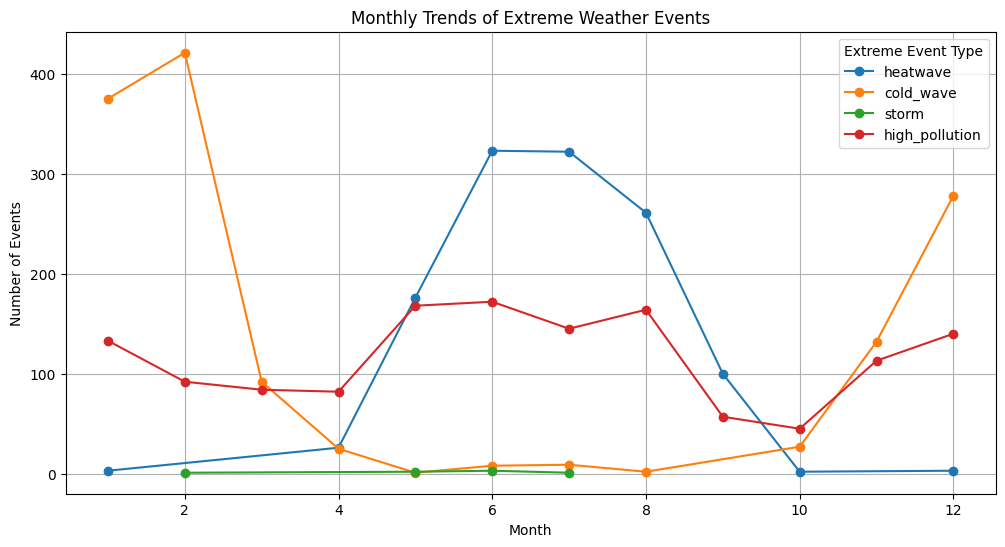

In [51]:

# Count number of extreme events per month (example: heatwave, storm, heavy rain etc.)
extreme_counts = {}
for event, df_event in extreme_events.items():
    if not df_event.empty:
        df_event = df_event.copy()
        df_event["month"] = df_event["last_updated"].dt.month
        extreme_counts[event] = df_event.groupby("month").size()

# Plot each extreme event trend
plt.figure(figsize=(12, 6))
for event, counts in extreme_counts.items():
    plt.plot(counts.index, counts.values, marker="o", label=event)

plt.legend(title="Extreme Event Type")
plt.title("Monthly Trends of Extreme Weather Events")
plt.xlabel("Month")
plt.ylabel("Number of Events")
plt.grid(True)
plt.show()


/tmp/ipython-input-1648197653.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




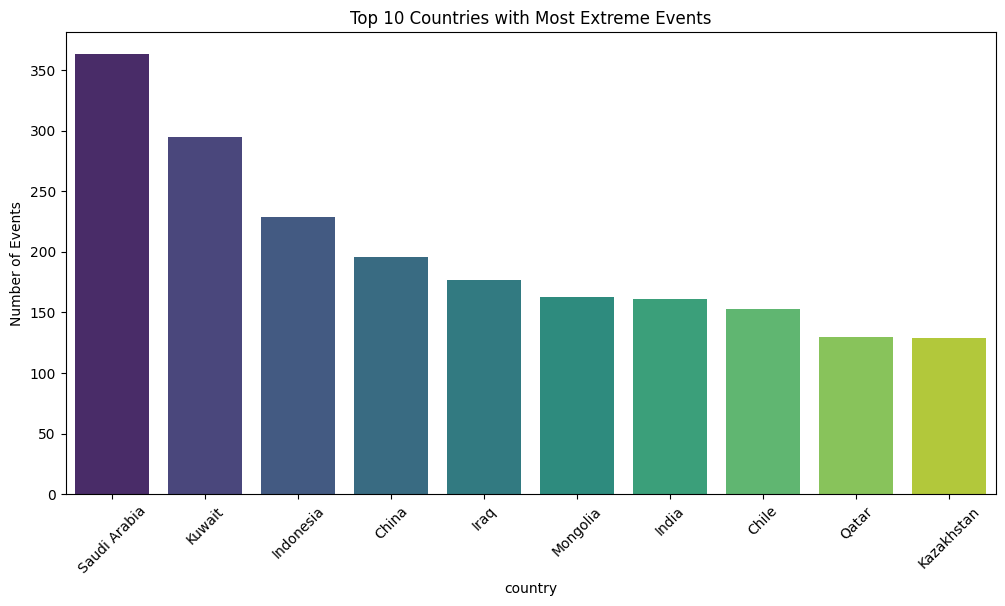

In [53]:
# Count extreme events by country
country_event_counts = {}
for event, df_event in extreme_events.items():
    if not df_event.empty:
        country_counts = df_event["country"].value_counts()
        country_event_counts[event] = country_counts

# Convert to DataFrame
country_event_df = pd.DataFrame(country_event_counts).fillna(0).astype(int)

# Show top 10 countries overall
top_countries = country_event_df.sum(axis=1).sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Most Extreme Events")
plt.ylabel("Number of Events")
plt.show()
